In [1]:
import os
import imageio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.utils import get_file

from deepcell.utils.plot_utils import create_rgb_image
from deepcell.datasets import SpotNetExampleData, SpotNet
from deepcell_spots.applications import SpotDetection

from function_bank import min_max_normalize, gaussian_filter

2024-11-05 18:25:28.486256: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-11-05 18:25:28.486280: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/jonathanhp/Spots/deepcell-spots-llm/venv/lib64/python3.9/site-packages/networkx/utils/backends.py:135: RuntimeWarning: networkx backend defined more than once: nx-loopback
  backends.update(_get_backends("networkx.backends"))
/home/jonathanhp/Spots/deepcell-spots-llm/venv/lib64/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [2]:
spots_images = np.load('spot_data/SpotNet-v1_1/train.npz', allow_pickle=True)['X']

In [3]:
spots_image = spots_images[0:4]
spots_image.shape

(4, 128, 128, 1)

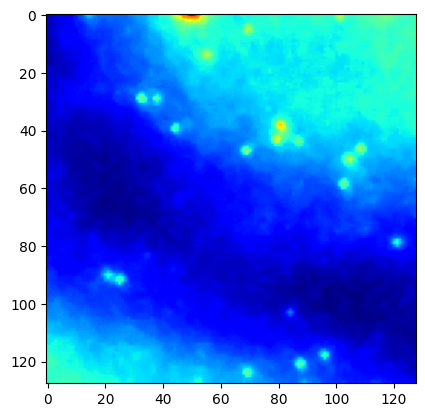

In [4]:
plt.imshow(spots_image[2].squeeze(), cmap='jet')

In [5]:
app = SpotDetection(preprocessing_fn=gaussian_filter)

INFO:root:Checking for cached data
INFO:root:Checking SpotDetection-8.tar.gz against provided file_hash...
INFO:root:SpotDetection-8.tar.gz with hash a6164e48ef8872a9524b4ec6726859d7 already available.
INFO:root:Extracting /home/jonathanhp/.deepcell/models/SpotDetection-8.tar.gz
INFO:root:Successfully extracted /home/jonathanhp/.deepcell/models/SpotDetection-8.tar.gz into /home/jonathanhp/.deepcell/models
2024-11-05 18:25:31.855937: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jonathanhp/Spots/deepcell-spots-llm/venv/lib/python3.9/site-packages/cv2/../../lib64:
2024-11-05 18:25:31.855958: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-11-05 18:25:31.855974: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on th

In [6]:
spots_image.shape

(4, 128, 128, 1)

In [7]:
pred = app.predict(spots_image, batch_size=4, threshold=0.95)

pred.shape

(4,)

In [8]:
pred

array([array([[123.30219448,  41.98395044],
              [ 83.16272214,   6.25208911],
              [ 79.24001855,  49.96127331],
              [ 91.35699552,  56.42923757],
              [ 19.11851581, 115.25607747],
              [106.09722298,  69.68029386]]),
       array([[ 86.03661539, 123.90258813],
              [101.79623656,  79.08202483],
              [ 78.8277797 ,  93.2143518 ],
              [ 58.17848632, 104.11711217],
              [ 77.18591622, 122.90294147],
              [ 60.02541092, 123.3627044 ],
              [ 66.20063174,  98.45937246],
              [ 60.99875034,  86.71408758],
              [ 78.39932132, 115.09046188],
              [ 66.39310235, 114.4054808 ],
              [ 75.71860397,  80.10744302],
              [ 87.20272288,  94.00894918],
              [ 89.53018862,  87.99767778],
              [123.75092734,  79.80430473]]),
       array([[ 50.00410189, 104.11991832],
              [ 38.57987177,  80.65335578],
              [ 47.02468299,

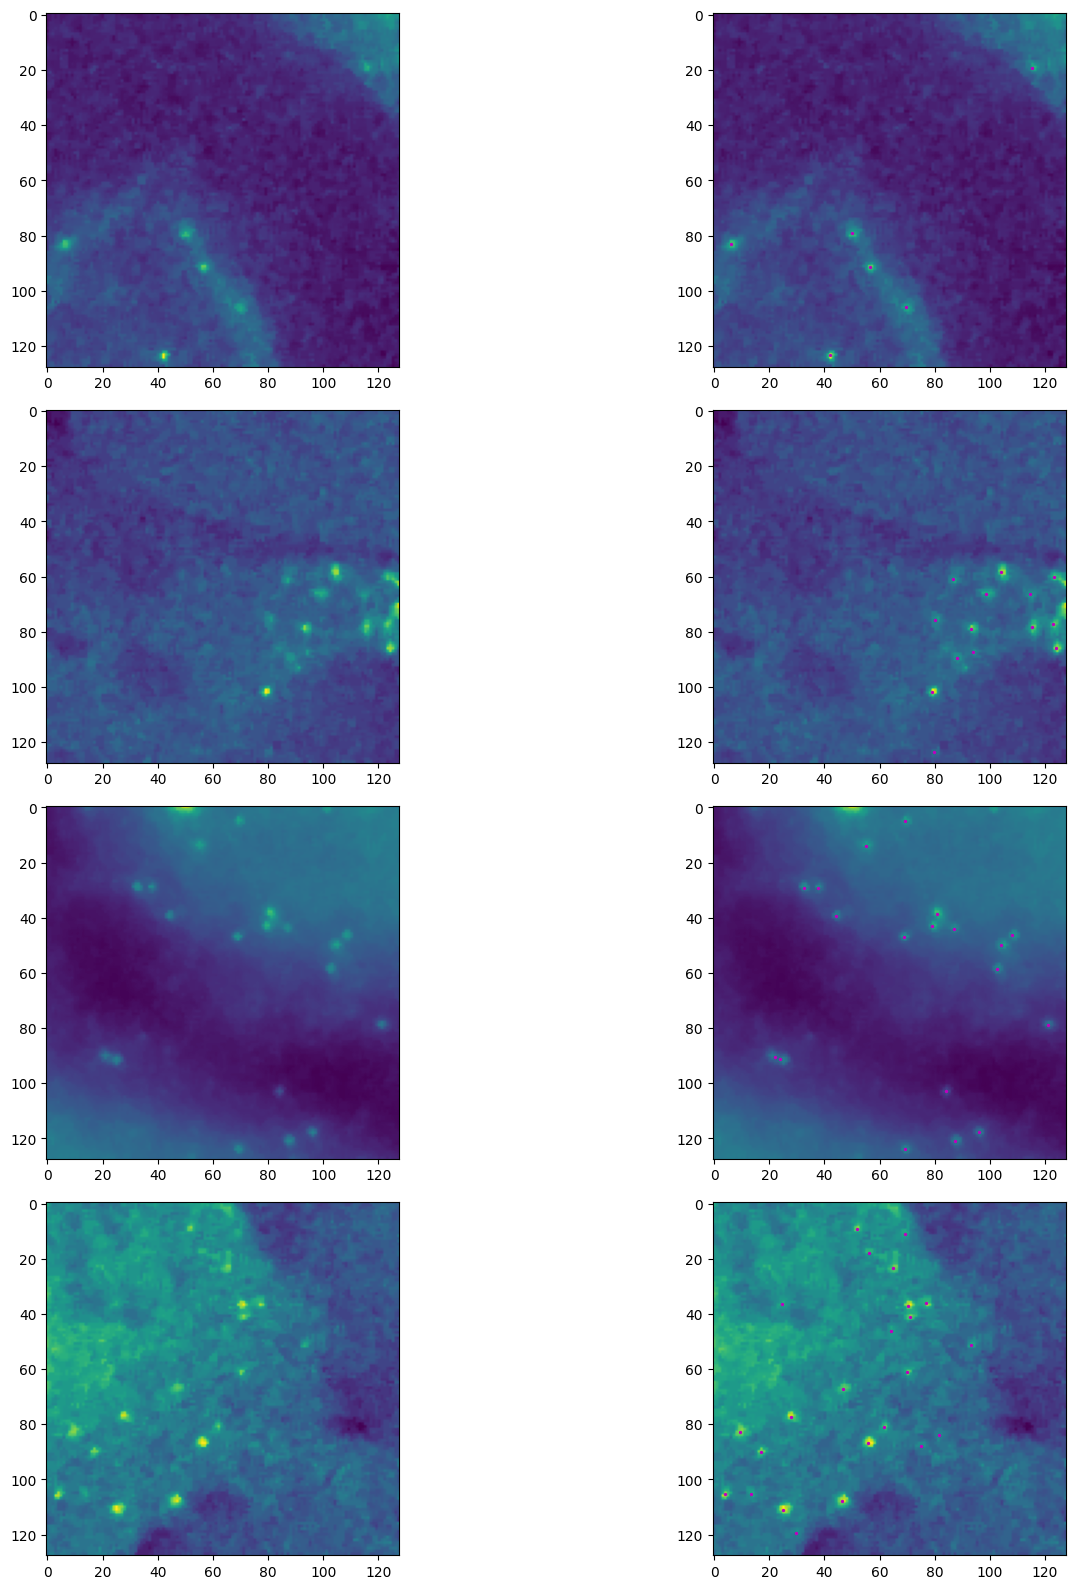

In [9]:
fig,ax = plt.subplots(4,2,figsize=(16,16))

for i in range(4):
    ax[i,0].imshow(spots_image[i,...,0], cmap='viridis')
    ax[i,1].imshow(spots_image[i,...,0], cmap='viridis')
    ax[i,1].scatter(pred[i][:,1], pred[i][:,0], c='m', s=2)


plt.tight_layout()
plt.show()